In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [3]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


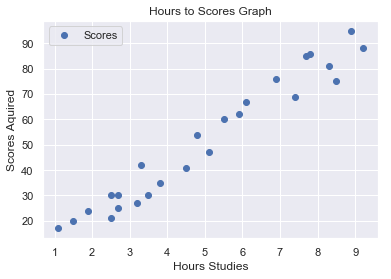

In [44]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours to Scores Graph')
plt.xlabel('Hours Studies')
plt.ylabel('Scores Aquired')
plt.legend()
plt.show()

#### Data preparation

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

#### Splitting The Data Into Train & Test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Model Creation

In [27]:
line_reg_model = LinearRegression()
line_reg_model.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
line_reg_line = line_reg_model.coef_ * X + line_reg_model.intercept_

#Plotting the Graph

# df.plot(x='Hours', y='Scores', style='o')
# plt.title('Hours to Scores Graph')
# plt.xlabel('Hours Studies')
# plt.ylabel('Scores Aquired')
# plt.legend()
# plt.show()



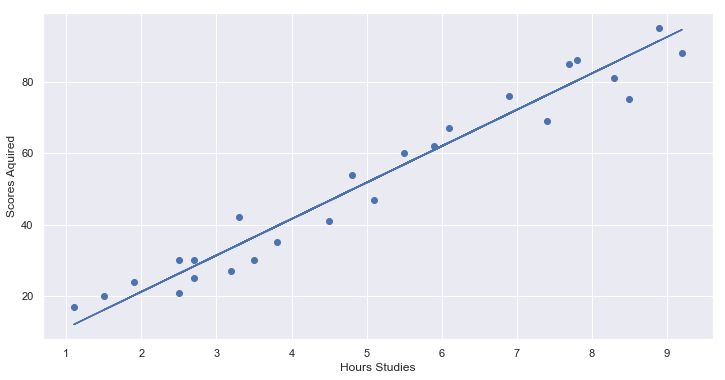

In [51]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y)
plt.xlabel('Hours Studies')
plt.ylabel('Scores Aquired')
plt.plot(X, line_reg_line)
plt.show()

In [46]:
model_predictions = line_reg_model.predict(X_test)

In [47]:
prediction_df = pd.DataFrame({
    'Original Values' : y_test,
    'Predicted_values' : model_predictions
})

prediction_df

,Original Values,Predicted_values
0,81,85.349681
1,30,26.314568
2,21,26.314568
3,76,71.099826
4,62,60.921358


In [50]:
line_reg_model.predict(4.3)

array([44.63580963])

### Evaluting the errors

In [49]:
MAS = metrics.mean_absolute_error(y_test, model_predictions)

RMSE = metrics.mean_squared_error(y_test, model_predictions)
RMSE = np.sqrt(RMSE)

print('Mean Absolute Error', MAS)
print('Mean Squared Error', RMSE)

Mean Absolute Error 3.865699361578642
Mean Squared Error 4.14540561295023


In [54]:
model_predictions.round(1)

array([85.3, 26.3, 26.3, 71.1, 60.9])